### KNN Classification

Given a KNN_Project_Data dataset, predict the target class

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('KNN_Project_Data')

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis =1))

StandardScaler()

In [8]:
scaled_feat = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [12]:
df_feat = pd.DataFrame(scaled_feat, columns = df.columns[:-1])

In [13]:
df_feat

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df_feat
y = df['TARGET CLASS']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 101)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [19]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred = knn.predict(x_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       150
           1       0.72      0.71      0.72       150

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [23]:
print(confusion_matrix(pred,y_test))

[[109  41]
 [ 43 107]]


In [25]:
# error checking for different values of k 
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

In [27]:
len(error_rate)

49

Text(0.5, 1.0, 'K Vs Error Rate')

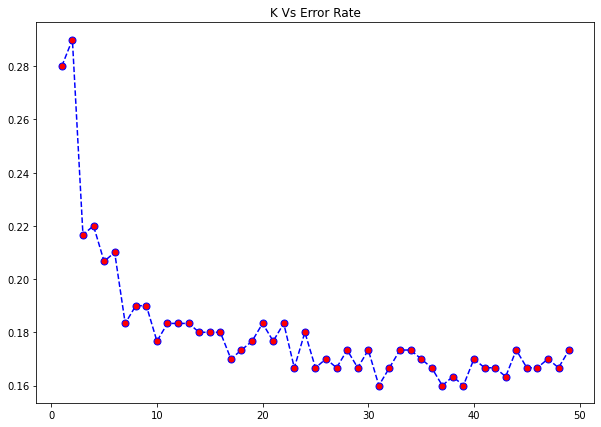

In [28]:
plt.figure(figsize= (10,7))
plt.plot(range(1,50), error_rate, linestyle = '--', color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 7)
plt.title('K Vs Error Rate')

From gragh we can conclude that at k = 31 error rate is the lowest

In [30]:
knn = KNeighborsClassifier(n_neighbors = 31)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=31)

In [31]:
pred = knn.predict(x_test)

In [32]:
print(confusion_matrix(pred, y_test))

[[123  19]
 [ 29 129]]


In [33]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       142
           1       0.87      0.82      0.84       158

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

